## Imports

In [51]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt


# Sample Function

In [ ]:
f = lambda x: np.sin(x ** 2) * x + 5

x0 = 0 # -4
x1 = 4 # 2 * np.pi
n = 100

x = np.linspace(x0, x1 + (x1 - x0)*2/n, n + 2)
y = np.vectorize(f)(x)

plt.plot(x, y, label="f", color="blue")
plt.legend()
plt.show()

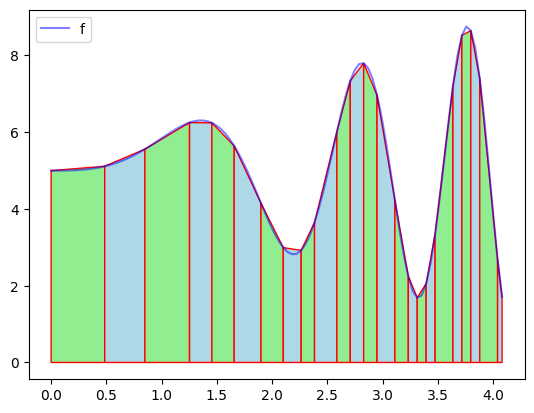

In [94]:
def div(a,b):
  # if b == 0:
  # print(f"div({a},{b})")
  # return 0
  return a / b if b != 0 else 0

def average_error(x, y, i, j):
  if j - i == 1:
    return 0
  # print(f"average_Error {i} {j}")
  # if i ==95 and j == 96:
  #   print("stop")
  # print(f"{x[j-1] - x[i]} {x[j-1]} {x[i]}")
  m = div((y[j-1] - y[i]) , (x[j-1] - x[i]))
  # m = (y[j-1] - y[i]) / (x[j-1] - x[i])
  b = y[i]
  errors = [abs((m * (x[k]-x[i])) + b - y[k]) for k in range(i, j)]
  return np.mean(errors)

def total_error(x, y, i, j):
  if j - i == 1:
    return 0
  # print(f"average_Error {i} {j}")
  # if i ==95 and j == 96:
  #   print("stop")
  # print(f"{x[j-1] - x[i]} {x[j-1]} {x[i]}")
  m = div((y[j-1] - y[i]) , (x[j-1] - x[i]))
  # m = (y[j-1] - y[i]) / (x[j-1] - x[i])
  b = y[i]
  errors = [abs((m * (x[k]-x[i])) + b - y[k]) for k in range(i, j)]
  return np.sum(errors)

# Finds the longest run where the average error is less than epsilon
def next_piece(x, y, epsilon, i):
  # print(f"next_piece {i}")
  # if i == 101:
  #   print("stop")
  best_piece = None # (i, i, 0)
  # best_error = None
  j = i + 1
  while j <= len(x):
    # error = average_error(x, y, i, j)
    error = total_error(x, y, i, j)
    if error > epsilon:
      break
    best_piece = (i, j, error)
    # if best_piece:
    #   if error < best_piece[2]:
    #     best_piece = (i, j, error)
    #     # best_error = error
    # else:
    #   best_piece = (i, j, error)
    #   # best_error = error
    j += 1

  # print(f"best_piece: {best_piece}")
  return best_piece
  # return (i, j - 1) # (x[i:j], y[i:j], i, j - 1)

def piecewise(x, y, epsilon, pieces):
  i = 0
  count = 0
  while i < len(x) - 1:
    piece = next_piece(x, y, epsilon, i)
    pieces.append(piece)
    # print(f"{i}: {piece}")
    i = piece[1] - 1
    count = count + 1
    if count > 50:
      break
    # i = i + 1 piece[-1] + 1
  return pieces

# next_piece(x, y, .5, 0)
# print(f"length = {len(x)}")
segments = piecewise(x, y, .05, [])
segments = piecewise(x, y, .35, [])

fig, ax = plt.subplots()
# for i in range(len(segments)):
for i, s in enumerate(segments):
    vertices = [(x[s[0]], 0), (x[s[0]], y[s[0]]), (x[s[1]-1], y[s[1]-1]), (x[s[1]-1], 0)]
    color = 'lightgreen' if i % 2 == 0 else 'lightblue'
    polygon = patches.Polygon(vertices, closed=True, fill=True, edgecolor='r', facecolor=color)
    # print(f"{i}: {polygon}")
    ax.add_patch(polygon)

plt.plot(x, y, label="f", color="blue", alpha=0.5)
# plt.scatter([x[s[0]] for s in segments], [y[s[0]] for s in segments], color="red", label="Training samples")
plt.legend()
plt.show()
